# Image Recognition (with keras)

Example code for the lecture series "Machine Learning for Physicists" by Florian Marquardt

Session 4: Homework for lecture 3

See https://machine-learning-for-physicists.org and the current course website linked there!

This notebook shows how to:
- recognize images (softmax, cross-entropy), using dense layers



### Imports: numpy and matplotlib and keras

In [1]:
# keras: Sequential is the neural-network class, Dense is
# the standard network layer
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers # to choose more advanced optimizers like 'adam'

from tqdm import tqdm # progress bar

import numpy as np

import matplotlib.pyplot as plt # for plotting
import matplotlib
matplotlib.rcParams['figure.dpi']=90 # highres display

# for updating display 
# (very simple animation)
from IPython.display import clear_output
from time import sleep

2023-06-12 10:22:51.028887: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


# From circles to squares

### only densely connected network

In [80]:
# produce random circles, returning also their equivalent squares

def my_generator2D(batchsize,x,y):
    R=np.random.uniform(low=0.2,high=1,size=batchsize)
    x0=np.random.uniform(size=batchsize,low=-0.8,high=0.8)
    y0=np.random.uniform(size=batchsize,low=-0.8,high=0.8)
    v_batches = np.ones(batchsize)
    Circles=1.0*((x[None,:]-x0[:,None])**2 + (y[None,:]-y0[:,None])**2 < R[:,None]**2)
    Squares=1.0*(np.abs(x[None,:]-x0[:,None])<R[:,None])*(np.abs(y[None,:]-y0[:,None])<R[:,None])
    inputLayer = v_batches[:, None]*Circles
    resultLayer= v_batches[:, None]*Squares
    return( inputLayer, resultLayer  )



In [81]:
N=20 # number of pixels in 'image'

Net=Sequential()
Net.add(Dense(30,input_shape=(N**2,), activation="relu"))
Net.add(Dense(20,activation="relu"))
Net.add(Dense(N**2,activation="linear"))

Net.compile(loss='mean_squared_error', 
            optimizer='adam',
            metrics='accuracy')



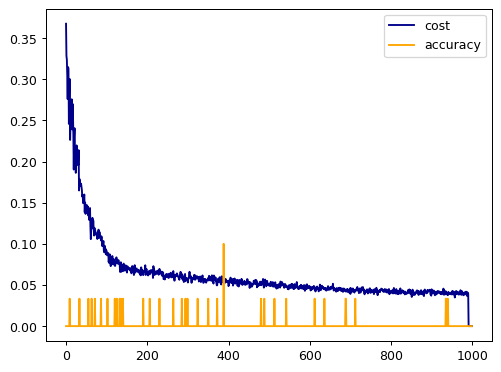

In [82]:
batchsize=30
steps=1000

vals=np.linspace(-1,1,N)
X,Y=np.meshgrid(vals,vals)
x,y=X.flatten(),Y.flatten() # make 1D arrays, as needed for dense layers!

costs=np.zeros(steps)
accuracy=np.zeros(steps)
skipsteps=10

for j in range(steps):
    y_in,y_target=my_generator2D(batchsize,x,y)
    costs[j],accuracy[j]=Net.train_on_batch(y_in,y_target)
    if j%skipsteps==0:
        clear_output(wait=True)
        plt.plot(costs,color="darkblue",label="cost")
        plt.plot(accuracy,color="orange",label="accuracy")
        plt.legend()
        plt.show()

In [83]:
y_in,y_target=my_generator2D(batchsize,x,y)
y_pred=Net.predict_on_batch(y_in)


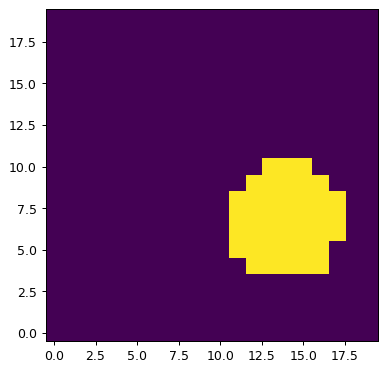

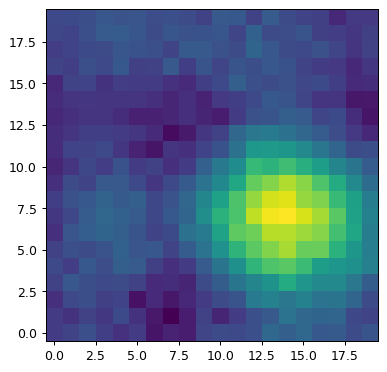

In [84]:
index_plotting = 0
plt.imshow(np.reshape(y_in[index_plotting,:],[N,N]),origin='lower')
plt.figure()
plt.imshow(np.reshape(y_pred[index_plotting,:],[N,N]),origin='lower')

### Using conv networks

In [86]:
from tensorflow.keras.layers import Dense, Conv2D, AveragePooling2D, UpSampling2D


In [239]:
# produce random circles, returning also their equivalent squares

def my_generator2D(batchsize,x,y):
    R=np.random.uniform(low=0.2,high=1,size=batchsize)
    x0=np.random.uniform(size=batchsize,low=-0.8,high=0.8)
    y0=np.random.uniform(size=batchsize,low=-0.8,high=0.8)
    v_batches = np.ones(batchsize)
    Circles=1.0*((x[None,:,:]-x0[:,None,None])**2 + (y[None,:,:]-y0[:,None,None])**2 < R[:,None,None]**2)
    Squares=1.0*(np.abs(x[None,:,:]-x0[:,None, None])<R[:,None, None])*(np.abs(y[None,:,:]-y0[:,None,None])<R[:,None,None])
    inputLayer = v_batches[:, None, None]*Circles
    resultLayer= v_batches[:, None, None]*Squares
    return( inputLayer, resultLayer  )



In [201]:
N=40 # number of pixels in 'image'

Net=Sequential()
# 3x3 kernel size, 10 channels in first hidden layer:
Net.add(Conv2D(3,10,input_shape=(None,None,1),
               activation="relu",padding='same'))
# 3x3 kernel size, only 1 channel in last hidden layer:
Net.add(Conv2D(1,3,activation="relu",padding='same'))
Net.compile(loss='mean_squared_error',
              optimizer='adam',
            metrics='accuracy')



In [187]:
Net.summary()

Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_39 (Conv2D)          (None, None, None, 3)     30        
                                                                 
 conv2d_40 (Conv2D)          (None, None, None, 1)     28        
                                                                 
Total params: 58
Trainable params: 58
Non-trainable params: 0
_________________________________________________________________


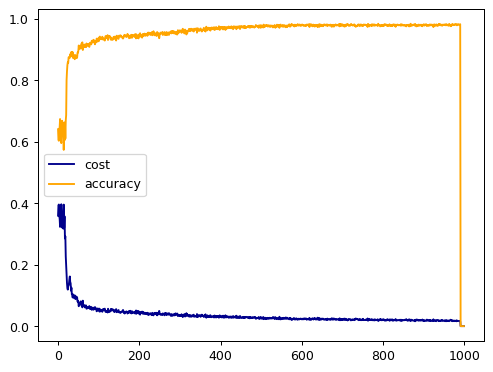

In [202]:
batchsize=30
steps=1000

vals=np.linspace(-1,1,N)
X,Y=np.meshgrid(vals,vals)
#x,y=X.flatten(),Y.flatten() # make 1D arrays, as needed for dense layers!

costs=np.zeros(steps)
accuracy=np.zeros(steps)
skipsteps=10

for j in range(steps):
    y_in,y_target=my_generator2D(batchsize,X,Y)
    costs[j],accuracy[j]=Net.train_on_batch(y_in,y_target)
    if j%skipsteps==0:
        clear_output(wait=True)
        plt.plot(costs,color="darkblue",label="cost")
        plt.plot(accuracy,color="orange",label="accuracy")
        plt.legend()
        plt.show()

In [207]:
y_in,y_target=my_generator2D(batchsize,X,Y)
y_pred=Net.predict_on_batch(y_in)


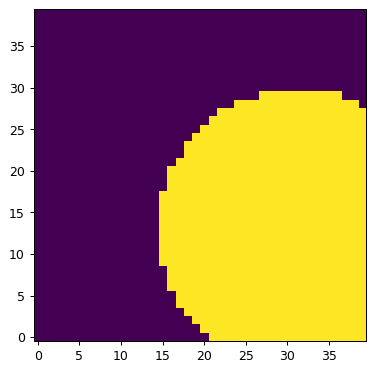

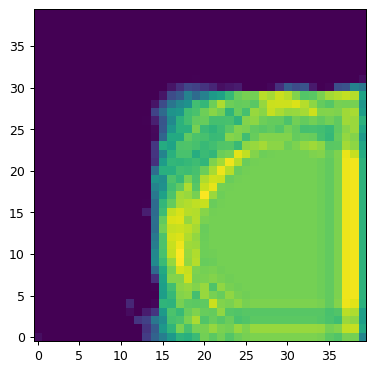

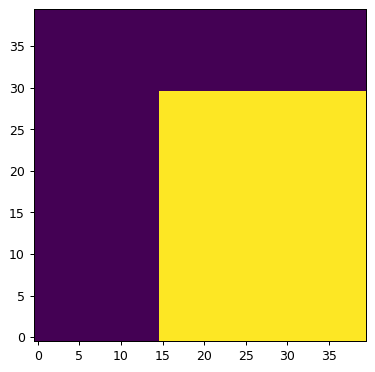

In [208]:
index_plotting = 10
plt.imshow(np.reshape(y_in[index_plotting,:,:],[N,N]),origin='lower')
plt.figure()
plt.imshow(np.reshape(y_pred[index_plotting,:,:],[N,N]),origin='lower')
plt.figure()
plt.imshow(np.reshape(y_target[index_plotting,:,:],[N,N]),origin='lower')

Exercise: Denoising autoencoder Train a neural network to get rid of noise in images that show a randomly placed circle of random size. Use convolutional layers with downsampling for the encoder, and convolutional layers with upsampling for the decoder (use UpSampling2D). Generate random training images and feed a noisy version of each image into the autoencoder as input, while defining the original image as the target. Vary the challenge by producing other sorts of training images, with more complicated shapes! Instead of simple noise, try to obscure the original image by deleting pieces (e.g. setting all pixels to zero in randomly chosen small squares).

In [240]:
# produce random circles with noise, returning also circles without noise

def my_generator2D(batchsize,x,y):
    R=np.random.uniform(low=0.2,high=1,size=batchsize)
    x0=np.random.uniform(size=batchsize,low=-0.8,high=0.8)
    y0=np.random.uniform(size=batchsize,low=-0.8,high=0.8)
    noise_stddev = 0.2
    noise = np.random.normal(loc=0, scale=noise_stddev, size=(batchsize, len(X), len(Y)))
    v_batches = np.ones(batchsize)
    Circles=1.0*((x[None,:,:]-x0[:,None,None])**2 + (y[None,:,:]-y0[:,None,None])**2 < R[:,None,None]**2)
    inputLayer = v_batches[:, None, None]*Circles + noise
    resultLayer= v_batches[:, None, None]*Circles
    return( inputLayer, resultLayer  )



In [241]:
N=27 # number of pixels in 'image'

# Net=Sequential()
# # 3x3 kernel size, 10 channels in first hidden layer:
# Net.add(Conv2D(3,10,input_shape=(None,None,1),
#                activation="relu",padding='same'))
# # 3x3 kernel size, only 1 channel in last hidden layer:
# Net.add(Conv2D(1,3,activation="relu",padding='same'))
# Net.compile(loss='mean_squared_error',
#               optimizer='adam',
#             metrics='accuracy')
Net=Sequential()
# 3x3 kernel size, 4 channels in first hidden layer:
Net.add(Conv2D(4,5,input_shape=(None,None,1),
               activation="relu",padding='same'))
Net.add(AveragePooling2D(pool_size=(3,3),padding='same')) # down
Net.add(Conv2D(4,5,
               activation="relu",padding='same'))
Net.add(AveragePooling2D(pool_size=(3,3),padding='same')) # down
Net.add(Conv2D(1,3,
               activation="relu",padding='same'))
Net.add(UpSampling2D(size=(3,3))) # up
Net.add(Conv2D(4,5,
               activation="relu",padding='same'))
Net.add(UpSampling2D(size=(3,3))) # up
Net.add(Conv2D(4,5,
               activation="relu",padding='same'))
Net.add(Conv2D(1,3,activation="linear",padding='same'))
Net.compile(loss='mean_squared_error',
              optimizer='adam',
              metrics='accuracy')


In [242]:
Net.summary()

Model: "sequential_35"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_73 (Conv2D)          (None, None, None, 4)     104       
                                                                 
 average_pooling2d_10 (Avera  (None, None, None, 4)    0         
 gePooling2D)                                                    
                                                                 
 conv2d_74 (Conv2D)          (None, None, None, 4)     404       
                                                                 
 average_pooling2d_11 (Avera  (None, None, None, 4)    0         
 gePooling2D)                                                    
                                                                 
 conv2d_75 (Conv2D)          (None, None, None, 1)     37        
                                                                 
 up_sampling2d_10 (UpSamplin  (None, None, None, 1)  

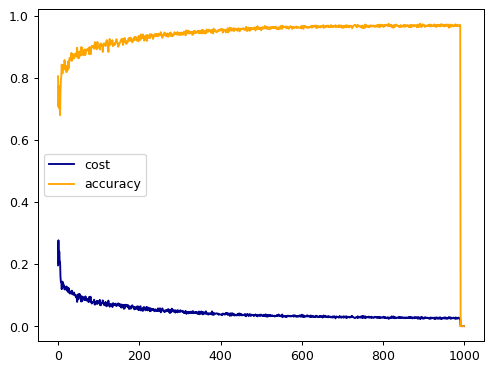

In [243]:
batchsize=30
steps=1000

vals=np.linspace(-1,1,N)
X,Y=np.meshgrid(vals,vals)
#x,y=X.flatten(),Y.flatten() # make 1D arrays, as needed for dense layers!

costs=np.zeros(steps)
accuracy=np.zeros(steps)
skipsteps=10

for j in range(steps):
    y_in,y_target=my_generator2D(batchsize,X,Y)
    costs[j],accuracy[j]=Net.train_on_batch(y_in,y_target)
    if j%skipsteps==0:
        clear_output(wait=True)
        plt.plot(costs,color="darkblue",label="cost")
        plt.plot(accuracy,color="orange",label="accuracy")
        plt.legend()
        plt.show()

In [244]:
y_in,y_target=my_generator2D(batchsize,X,Y)
y_pred=Net.predict_on_batch(y_in)


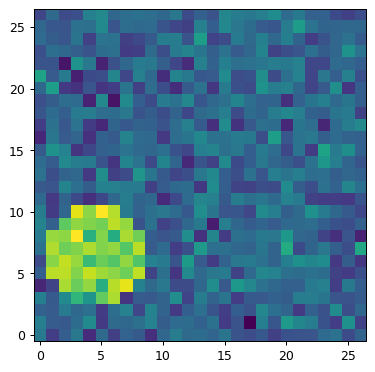

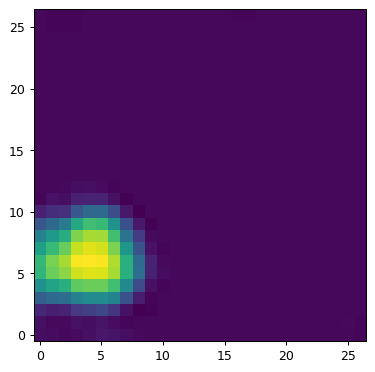

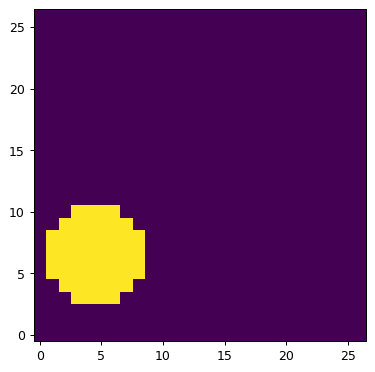

In [245]:
index_plotting = 10
plt.imshow(np.reshape(y_in[index_plotting,:,:],[N,N]),origin='lower')
plt.figure()
plt.imshow(np.reshape(y_pred[index_plotting,:,:],[N,N]),origin='lower')
plt.figure()
plt.imshow(np.reshape(y_target[index_plotting,:,:],[N,N]),origin='lower')